In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

In [2]:
df = pd.read_csv("cleaned_df.csv")
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3,avg_Grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,4,3,4,1,1,3,4,11,5.5
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,5,3,3,1,1,3,2,11,10.0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,no,4,3,2,2,3,3,6,12,12.5
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,3,2,2,1,1,5,0,14,14.0
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,4,3,2,1,2,5,0,13,12.0


In [3]:
df["Success"] = df["G3"].apply(lambda x: 1 if x >=10 else 0 )
df.drop("G3",axis=1)
X,y = df.drop("Success",axis=1),df["Success"]

In [4]:
df_copy = df.copy()
binary_encoder = LabelEncoder()
# These are the columns affecting the target from our hypothesis testing
columns = ['school', 'sex', 'address', 'schoolsup', 'higher', 'internet']
for col in columns:
    df_copy[f'{col}2'] = binary_encoder.fit_transform(df[f'{col}'])
df_copy.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,absences,G3,avg_Grade,Success,school2,sex2,address2,schoolsup2,higher2,internet2
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,11,5.5,1,0,0,1,1,1,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,2,11,10.0,1,0,0,1,0,1,1
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,6,12,12.5,1,0,0,1,1,1,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,0,14,14.0,1,0,0,1,0,1,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,0,13,12.0,1,0,0,1,0,1,0


In [5]:
columns2=[f"{c}2"for c in columns]
# These features have strong correlation with our targeet variable
columns2.extend(['avg_Grade',"Dalc","goout"])
columns2

['school2',
 'sex2',
 'address2',
 'schoolsup2',
 'higher2',
 'internet2',
 'avg_Grade',
 'Dalc',
 'goout']

In [6]:
X = df_copy[columns2]
y = df_copy['Success']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Logistic Regression handles categorical values unlike linear regression. It employs a sigmoid function to transform the relationship between independent variables and the predicted outcome into probabilities ranging from 0 to 1.

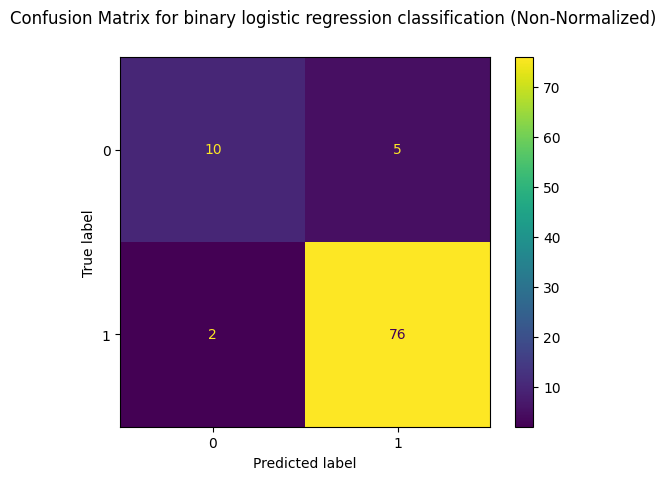

Test Accuracy: 0.9247311827956989
Train Accuracy: 0.9381720430107527
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.67      0.74        15
           1       0.94      0.97      0.96        78

    accuracy                           0.92        93
   macro avg       0.89      0.82      0.85        93
weighted avg       0.92      0.92      0.92        93



In [26]:

def classification(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LogisticRegression(max_iter=1000)  # Increase max_iter
    model.fit(X_train, y_train)
    
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    
    test_accuracy = accuracy_score(y_test, y_pred_test)
    train_accuracy = accuracy_score(y_train, y_pred_train)
    report = classification_report(y_test, y_pred_test)
    
    disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
    disp.figure_.suptitle("Confusion Matrix for binary logistic regression classification (Non-Normalized)")
    plt.show()
    
    return report, test_accuracy, train_accuracy

report, test_accuracy, train_accuracy = classification(X, y)
print("Test Accuracy:", test_accuracy)
print("Train Accuracy:", train_accuracy)
print("Classification Report:")
print(report)


Naïve bayes model assumes independence between features given the class label. Despite its simplicity, It performs well with highdimensional data

In [20]:
nb_classifier = GaussianNB()
    
nb_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_test = nb_classifier.predict(X_test)
y_pred_train = nb_classifier.predict(X_train)

# Calculate the accuracy of the model
test_accuracy = accuracy_score(y_test, y_pred_test)
train_accuracy = accuracy_score(y_train, y_pred_train)
report = classification_report(y_test,y_pred_test)
print("Test Accuracy:", test_accuracy)
print("Train Accuracy:", train_accuracy)
print("Report", report)

Test Accuracy: 0.9032258064516129
Train Accuracy: 0.9032258064516129
Report               precision    recall  f1-score   support

           0       0.67      0.80      0.73        15
           1       0.96      0.92      0.94        78

    accuracy                           0.90        93
   macro avg       0.81      0.86      0.83        93
weighted avg       0.91      0.90      0.91        93



KNN identifies the 'k' data points nearest to the new, unclassified data point using a distance measure (e.g., Euclidean distance) from the training set. Optimal performance in KNN necessitates selecting an appropriate 'k' value and ensuring high-quality training data.

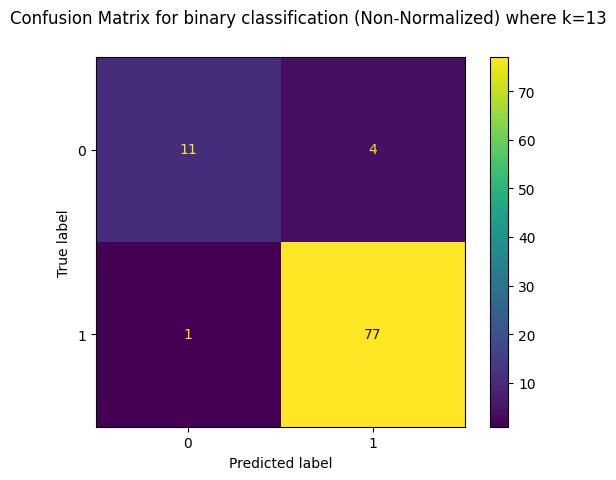

Best test Accuracy: 0.946236559139785 for k=13
Best train Accuracy: 0.9946236559139785 for k=1
Classification Report for Best Accuracy:
              precision    recall  f1-score   support

           0       0.92      0.73      0.81        15
           1       0.95      0.99      0.97        78

    accuracy                           0.95        93
   macro avg       0.93      0.86      0.89        93
weighted avg       0.95      0.95      0.94        93



In [25]:
neighbors = list(range(1, 27, 2))
best_test_accuracy = 0
best_train_accuracy = 0
best_k = None

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    y_pred_test = knn.predict(X_test)
    y_pred_train = knn.predict(X_train)
    
    test_accuracy = accuracy_score(y_test, y_pred_test)
    if test_accuracy > best_test_accuracy:
        best_test_accuracy = test_accuracy
        best_test_k = k
    
    train_accuracy = accuracy_score(y_train, y_pred_train)
    if train_accuracy > best_train_accuracy:
        best_train_accuracy = train_accuracy
        best_train_k = k
    
# Generate confusion matrix for the best accuracy
knn_best = KNeighborsClassifier(n_neighbors=best_test_k)
knn_best.fit(X_train, y_train)
y_pred_best = knn_best.predict(X_test)
disp = ConfusionMatrixDisplay.from_estimator(knn_best, X_test, y_test)
disp.figure_.suptitle(f"Confusion Matrix for binary classification (Non-Normalized) where k={best_test_k}")
plt.show()

print(f"Best test Accuracy: {best_test_accuracy} for k={best_test_k}")
print(f"Best train Accuracy: {best_train_accuracy} for k={best_train_k}")

# Print classification report for the best accuracy
y_pred_best = knn_best.predict(X_test)
report = classification_report(y_test, y_pred_best)
print("Classification Report for Best Accuracy:")
print(report)
